# Cleaning, Transformation and Analysis of Flights Datasets

By Hassan Moughanieh 

Data source: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

In [246]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [247]:
df_economy = pd.read_csv(r'C:\Users\User\Downloads\Flight Datasets\economy.csv')
df_business = pd.read_csv(r'C:\Users\User\Downloads\Flight Datasets\business.csv')

In [248]:
display(df_economy.head())
display(df_business.head())

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [249]:
#add class column to both datasets
df_economy['class'] = "Economy"
df_business['class'] = "Business"

In [250]:
df = pd.merge(df_economy, df_business, how ='outer', on=['date','airline','ch_code','num_code','dep_time','from','time_taken','stop','arr_time','to'])
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price_x,class_x,price_y,class_y
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy,NaN,NaN
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy,NaN,NaN
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy,NaN,NaN
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy,NaN,NaN
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy,NaN,NaN


In [251]:
# morege price and class columns
df["price_x"].fillna(df['price_y'], inplace = True)
df["class_x"].fillna(df['class_y'], inplace = True)

df = df.drop(['price_y', 'class_y'], axis=1)

In [252]:
#rename price and class columns
df.rename(columns={'price_x':'price', 'class_x':'class'}, inplace = True)
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy


In [253]:
#check the number of missing values
for col in df:
    missing_pct = np.sum(df[col].isna())
    print(col, "-", missing_pct)

date - 0
airline - 0
ch_code - 0
num_code - 0
dep_time - 0
from - 0
time_taken - 0
stop - 0
arr_time - 0
to - 0
price - 0
class - 0


In [254]:
set(df.date)

{'01-03-2022',
 '02-03-2022',
 '03-03-2022',
 '04-03-2022',
 '05-03-2022',
 '06-03-2022',
 '07-03-2022',
 '08-03-2022',
 '09-03-2022',
 '10-03-2022',
 '11-02-2022',
 '11-03-2022',
 '12-02-2022',
 '12-03-2022',
 '13-02-2022',
 '13-03-2022',
 '14-02-2022',
 '14-03-2022',
 '15-02-2022',
 '15-03-2022',
 '16-02-2022',
 '16-03-2022',
 '17-02-2022',
 '17-03-2022',
 '18-02-2022',
 '18-03-2022',
 '19-02-2022',
 '19-03-2022',
 '20-02-2022',
 '20-03-2022',
 '21-02-2022',
 '21-03-2022',
 '22-02-2022',
 '22-03-2022',
 '23-02-2022',
 '23-03-2022',
 '24-02-2022',
 '24-03-2022',
 '25-02-2022',
 '25-03-2022',
 '26-02-2022',
 '26-03-2022',
 '27-02-2022',
 '27-03-2022',
 '28-02-2022',
 '28-03-2022',
 '29-03-2022',
 '30-03-2022',
 '31-03-2022'}

In [255]:
set(df.airline)

{'Air India',
 'AirAsia',
 'GO FIRST',
 'Indigo',
 'SpiceJet',
 'StarAir',
 'Trujet',
 'Vistara'}

In [256]:
df['airline'] = df['airline'].str.replace('Air India','Air_India')
df['airline'] = df['airline'].str.replace('GO FIRST','GO_FIRST')

In [257]:
set(df.airline)

{'AirAsia',
 'Air_India',
 'GO_FIRST',
 'Indigo',
 'SpiceJet',
 'StarAir',
 'Trujet',
 'Vistara'}

In [258]:
set(df.ch_code)

{'2T', '6E', 'AI', 'G8', 'I5', 'S5', 'SG', 'UK'}

In [259]:
set(df.num_code)

{8193,
 8195,
 8207,
 8253,
 8263,
 8264,
 101,
 102,
 103,
 105,
 107,
 108,
 113,
 116,
 118,
 119,
 121,
 123,
 125,
 126,
 128,
 131,
 132,
 133,
 134,
 135,
 136,
 138,
 139,
 143,
 145,
 146,
 8339,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 156,
 157,
 161,
 163,
 164,
 165,
 168,
 171,
 172,
 173,
 176,
 177,
 179,
 181,
 183,
 184,
 186,
 188,
 191,
 192,
 193,
 194,
 197,
 198,
 199,
 201,
 203,
 205,
 207,
 208,
 209,
 211,
 212,
 213,
 218,
 8411,
 219,
 221,
 223,
 224,
 227,
 231,
 232,
 234,
 236,
 237,
 241,
 242,
 244,
 245,
 246,
 248,
 251,
 254,
 255,
 261,
 263,
 264,
 266,
 268,
 269,
 271,
 274,
 275,
 276,
 282,
 283,
 285,
 286,
 287,
 8480,
 289,
 8483,
 292,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 312,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 325,
 327,
 329,
 330,
 331,
 332,
 334,
 336,
 337,
 338,
 339,
 341,
 343,
 345,
 346,
 347,
 349,
 351,
 353,
 354,
 356,
 357,
 358,
 360,
 361,
 363,
 364,
 365,


In [260]:
set(df.dep_time)

{'00:10',
 '00:15',
 '00:25',
 '00:30',
 '00:45',
 '01:15',
 '02:00',
 '02:15',
 '02:30',
 '02:40',
 '03:00',
 '03:05',
 '03:20',
 '03:30',
 '03:55',
 '04:00',
 '04:15',
 '04:25',
 '04:30',
 '04:35',
 '04:40',
 '04:45',
 '04:50',
 '04:55',
 '05:00',
 '05:05',
 '05:10',
 '05:15',
 '05:20',
 '05:25',
 '05:30',
 '05:35',
 '05:40',
 '05:45',
 '05:50',
 '05:55',
 '06:00',
 '06:05',
 '06:10',
 '06:15',
 '06:20',
 '06:25',
 '06:30',
 '06:35',
 '06:40',
 '06:45',
 '06:50',
 '06:55',
 '07:00',
 '07:05',
 '07:10',
 '07:15',
 '07:20',
 '07:25',
 '07:30',
 '07:35',
 '07:40',
 '07:45',
 '07:50',
 '07:55',
 '08:00',
 '08:05',
 '08:10',
 '08:15',
 '08:20',
 '08:25',
 '08:30',
 '08:35',
 '08:40',
 '08:45',
 '08:50',
 '08:55',
 '09:00',
 '09:05',
 '09:10',
 '09:15',
 '09:20',
 '09:25',
 '09:30',
 '09:35',
 '09:40',
 '09:45',
 '09:50',
 '09:55',
 '10:00',
 '10:05',
 '10:10',
 '10:15',
 '10:20',
 '10:25',
 '10:30',
 '10:35',
 '10:40',
 '10:45',
 '10:50',
 '10:55',
 '11:00',
 '11:05',
 '11:10',
 '11:15',


In [261]:
set(df.arr_time)

{'00:05',
 '00:10',
 '00:15',
 '00:20',
 '00:25',
 '00:30',
 '00:35',
 '00:40',
 '00:45',
 '00:50',
 '00:55',
 '01:00',
 '01:05',
 '01:10',
 '01:15',
 '01:20',
 '01:25',
 '01:30',
 '01:35',
 '01:40',
 '01:45',
 '01:50',
 '01:55',
 '02:00',
 '02:05',
 '02:10',
 '02:15',
 '02:20',
 '02:25',
 '02:30',
 '02:35',
 '02:50',
 '02:55',
 '03:00',
 '03:20',
 '03:35',
 '03:40',
 '03:45',
 '03:55',
 '04:10',
 '04:15',
 '04:40',
 '04:50',
 '04:55',
 '05:10',
 '05:15',
 '05:20',
 '05:25',
 '05:45',
 '05:50',
 '05:55',
 '06:05',
 '06:10',
 '06:15',
 '06:20',
 '06:30',
 '06:35',
 '06:40',
 '06:45',
 '06:50',
 '06:55',
 '07:00',
 '07:05',
 '07:10',
 '07:15',
 '07:20',
 '07:25',
 '07:30',
 '07:35',
 '07:40',
 '07:45',
 '07:50',
 '07:55',
 '08:00',
 '08:05',
 '08:10',
 '08:15',
 '08:20',
 '08:25',
 '08:30',
 '08:35',
 '08:40',
 '08:45',
 '08:50',
 '08:55',
 '09:00',
 '09:05',
 '09:10',
 '09:15',
 '09:20',
 '09:25',
 '09:30',
 '09:35',
 '09:40',
 '09:45',
 '09:50',
 '09:55',
 '10:00',
 '10:05',
 '10:10',


In [262]:
set(df.time_taken)

{'00h 50m',
 '00h 55m',
 '01h 00m',
 '01h 05m',
 '01h 10m',
 '01h 15m',
 '01h 20m',
 '01h 25m',
 '01h 30m',
 '01h 35m',
 '01h 40m',
 '01h 45m',
 '01h 50m',
 '01h 55m',
 '02h 00m',
 '02h 05m',
 '02h 10m',
 '02h 15m',
 '02h 20m',
 '02h 25m',
 '02h 30m',
 '02h 35m',
 '02h 40m',
 '02h 45m',
 '02h 50m',
 '02h 55m',
 '03h 00m',
 '03h 05m',
 '03h 10m',
 '03h 15m',
 '03h 20m',
 '03h 25m',
 '03h 30m',
 '03h 35m',
 '03h 40m',
 '03h 45m',
 '03h 50m',
 '03h 55m',
 '04h 00m',
 '04h 05m',
 '04h 10m',
 '04h 15m',
 '04h 20m',
 '04h 25m',
 '04h 30m',
 '04h 35m',
 '04h 40m',
 '04h 45m',
 '04h 50m',
 '04h 55m',
 '05h 00m',
 '05h 05m',
 '05h 10m',
 '05h 15m',
 '05h 20m',
 '05h 25m',
 '05h 30m',
 '05h 35m',
 '05h 40m',
 '05h 45m',
 '05h 50m',
 '05h 55m',
 '06h 00m',
 '06h 04m',
 '06h 05m',
 '06h 10m',
 '06h 15m',
 '06h 20m',
 '06h 25m',
 '06h 30m',
 '06h 35m',
 '06h 40m',
 '06h 45m',
 '06h 50m',
 '06h 55m',
 '06h 59m',
 '07h 00m',
 '07h 05m',
 '07h 10m',
 '07h 15m',
 '07h 20m',
 '07h 25m',
 '07h 30m',
 '07

In [263]:
#claculate the duration
df[["dep_time", "arr_time"]] = df[["dep_time", "arr_time"]].apply(pd.to_datetime)
df['duration'] = df['arr_time'] - df['dep_time']

In [264]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,duration
0,11-02-2022,SpiceJet,SG,8709,2023-03-24 18:55:00,Delhi,02h 10m,non-stop,2023-03-24 21:05:00,Mumbai,"5,953",Economy,0 days 02:10:00
1,11-02-2022,SpiceJet,SG,8157,2023-03-24 06:20:00,Delhi,02h 20m,non-stop,2023-03-24 08:40:00,Mumbai,"5,953",Economy,0 days 02:20:00
2,11-02-2022,AirAsia,I5,764,2023-03-24 04:25:00,Delhi,02h 10m,non-stop,2023-03-24 06:35:00,Mumbai,"5,956",Economy,0 days 02:10:00
3,11-02-2022,Vistara,UK,995,2023-03-24 10:20:00,Delhi,02h 15m,non-stop,2023-03-24 12:35:00,Mumbai,"5,955",Economy,0 days 02:15:00
4,11-02-2022,Vistara,UK,963,2023-03-24 08:50:00,Delhi,02h 20m,non-stop,2023-03-24 11:10:00,Mumbai,"5,955",Economy,0 days 02:20:00


In [265]:
df.dtypes

date                   object
airline                object
ch_code                object
num_code                int64
dep_time       datetime64[ns]
from                   object
time_taken             object
stop                   object
arr_time       datetime64[ns]
to                     object
price                  object
class                  object
duration      timedelta64[ns]
dtype: object

In [266]:
#duration as a float
df['duration'] = round(df['duration'].dt.components['hours'] +  df['duration'].dt.components['minutes']/60, 2)

In [267]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,duration
0,11-02-2022,SpiceJet,SG,8709,2023-03-24 18:55:00,Delhi,02h 10m,non-stop,2023-03-24 21:05:00,Mumbai,"5,953",Economy,2.17
1,11-02-2022,SpiceJet,SG,8157,2023-03-24 06:20:00,Delhi,02h 20m,non-stop,2023-03-24 08:40:00,Mumbai,"5,953",Economy,2.33
2,11-02-2022,AirAsia,I5,764,2023-03-24 04:25:00,Delhi,02h 10m,non-stop,2023-03-24 06:35:00,Mumbai,"5,956",Economy,2.17
3,11-02-2022,Vistara,UK,995,2023-03-24 10:20:00,Delhi,02h 15m,non-stop,2023-03-24 12:35:00,Mumbai,"5,955",Economy,2.25
4,11-02-2022,Vistara,UK,963,2023-03-24 08:50:00,Delhi,02h 20m,non-stop,2023-03-24 11:10:00,Mumbai,"5,955",Economy,2.33


In [268]:
set(df.stop)

{'1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t',
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t',
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi\n\t\t\t\t\t\t\t\t\t\t\t\t',
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t',
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t',
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t',
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia HYD\n\t\t\t\t\t\t\t\t\t\t\t\t',
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t',
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t',
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXR\n\t\t\t\t\t\t\t\t\t\t\t\t',
 '

In [269]:
#transform stop column
df['stop'] = df['stop'].str.split("\n", n = 1, expand = True)[0]

In [270]:
set(df.stop)

{'1-stop', '2+-stop', 'non-stop '}

In [271]:
df['stop'] = df['stop'].str.replace('1-stop','one')
df['stop'] = df['stop'].str.replace('2\+-stop','two')
df['stop'] = df['stop'].str.replace('non-stop','zero')

C:\Users\User\AppData\Local\Temp\ipykernel_25884\2853839221.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['stop'] = df['stop'].str.replace('2\+-stop','two')


In [272]:
set(df.stop)

{'one', 'two', 'zero '}

In [273]:
set(df.to)

{'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'}

In [274]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,duration
0,11-02-2022,SpiceJet,SG,8709,2023-03-24 18:55:00,Delhi,02h 10m,zero,2023-03-24 21:05:00,Mumbai,"5,953",Economy,2.17
1,11-02-2022,SpiceJet,SG,8157,2023-03-24 06:20:00,Delhi,02h 20m,zero,2023-03-24 08:40:00,Mumbai,"5,953",Economy,2.33
2,11-02-2022,AirAsia,I5,764,2023-03-24 04:25:00,Delhi,02h 10m,zero,2023-03-24 06:35:00,Mumbai,"5,956",Economy,2.17
3,11-02-2022,Vistara,UK,995,2023-03-24 10:20:00,Delhi,02h 15m,zero,2023-03-24 12:35:00,Mumbai,"5,955",Economy,2.25
4,11-02-2022,Vistara,UK,963,2023-03-24 08:50:00,Delhi,02h 20m,zero,2023-03-24 11:10:00,Mumbai,"5,955",Economy,2.33


In [275]:
#Create descrtiptive time columns for departure and arrival times
df['departure_time'] = df.dep_time.apply(lambda x: "Morning" if 5 <= x.hour < 12 else 
                                         ("Afternoon" if 12 <= x.hour < 17 else 
                                          ("Evening" if 17 <= x.hour < 21 else "Night")))

df['arrival_time'] = df.arr_time.apply(lambda x: "Morning" if 5 <= x.hour < 12 else 
                                       ("Afternoon" if 12 <= x.hour < 17 else 
                                        ("Evening" if 17 <= x.hour < 21 else "Night")))

In [276]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,duration,departure_time,arrival_time
0,11-02-2022,SpiceJet,SG,8709,2023-03-24 18:55:00,Delhi,02h 10m,zero,2023-03-24 21:05:00,Mumbai,"5,953",Economy,2.17,Evening,Night
1,11-02-2022,SpiceJet,SG,8157,2023-03-24 06:20:00,Delhi,02h 20m,zero,2023-03-24 08:40:00,Mumbai,"5,953",Economy,2.33,Morning,Morning
2,11-02-2022,AirAsia,I5,764,2023-03-24 04:25:00,Delhi,02h 10m,zero,2023-03-24 06:35:00,Mumbai,"5,956",Economy,2.17,Night,Morning
3,11-02-2022,Vistara,UK,995,2023-03-24 10:20:00,Delhi,02h 15m,zero,2023-03-24 12:35:00,Mumbai,"5,955",Economy,2.25,Morning,Afternoon
4,11-02-2022,Vistara,UK,963,2023-03-24 08:50:00,Delhi,02h 20m,zero,2023-03-24 11:10:00,Mumbai,"5,955",Economy,2.33,Morning,Morning


In [277]:
#combine flight details
df['flight'] = df.ch_code + "-" + df.num_code.astype(str)

In [278]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,duration,departure_time,arrival_time,flight
0,11-02-2022,SpiceJet,SG,8709,2023-03-24 18:55:00,Delhi,02h 10m,zero,2023-03-24 21:05:00,Mumbai,"5,953",Economy,2.17,Evening,Night,SG-8709
1,11-02-2022,SpiceJet,SG,8157,2023-03-24 06:20:00,Delhi,02h 20m,zero,2023-03-24 08:40:00,Mumbai,"5,953",Economy,2.33,Morning,Morning,SG-8157
2,11-02-2022,AirAsia,I5,764,2023-03-24 04:25:00,Delhi,02h 10m,zero,2023-03-24 06:35:00,Mumbai,"5,956",Economy,2.17,Night,Morning,I5-764
3,11-02-2022,Vistara,UK,995,2023-03-24 10:20:00,Delhi,02h 15m,zero,2023-03-24 12:35:00,Mumbai,"5,955",Economy,2.25,Morning,Afternoon,UK-995
4,11-02-2022,Vistara,UK,963,2023-03-24 08:50:00,Delhi,02h 20m,zero,2023-03-24 11:10:00,Mumbai,"5,955",Economy,2.33,Morning,Morning,UK-963


In [279]:
#change date to datetime
df['date'] = pd.to_datetime(df['date'])

C:\Users\User\AppData\Local\Temp\ipykernel_25884\1461425439.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


In [280]:
#create final df
df = df[['date','airline', 'flight', 'from', 'departure_time', 'duration', 'stop', 'to', 'arrival_time', 'class', 'price']]
df.head()

,date,airline,flight,from,departure_time,duration,stop,to,arrival_time,class,price
0,2022-11-02,SpiceJet,SG-8709,Delhi,Evening,2.17,zero,Mumbai,Night,Economy,"5,953"
1,2022-11-02,SpiceJet,SG-8157,Delhi,Morning,2.33,zero,Mumbai,Morning,Economy,"5,953"
2,2022-11-02,AirAsia,I5-764,Delhi,Night,2.17,zero,Mumbai,Morning,Economy,"5,956"
3,2022-11-02,Vistara,UK-995,Delhi,Morning,2.25,zero,Mumbai,Afternoon,Economy,"5,955"
4,2022-11-02,Vistara,UK-963,Delhi,Morning,2.33,zero,Mumbai,Morning,Economy,"5,955"


In [281]:
df.rename(columns={'from':'departure_city', 'stop':'stops', 'to':'destination_city'}, inplace=True)

In [282]:
df.head()

,date,airline,flight,departure_city,departure_time,duration,stops,destination_city,arrival_time,class,price
0,2022-11-02,SpiceJet,SG-8709,Delhi,Evening,2.17,zero,Mumbai,Night,Economy,"5,953"
1,2022-11-02,SpiceJet,SG-8157,Delhi,Morning,2.33,zero,Mumbai,Morning,Economy,"5,953"
2,2022-11-02,AirAsia,I5-764,Delhi,Night,2.17,zero,Mumbai,Morning,Economy,"5,956"
3,2022-11-02,Vistara,UK-995,Delhi,Morning,2.25,zero,Mumbai,Afternoon,Economy,"5,955"
4,2022-11-02,Vistara,UK-963,Delhi,Morning,2.33,zero,Mumbai,Morning,Economy,"5,955"


In [283]:
#change price data type to float
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(int)

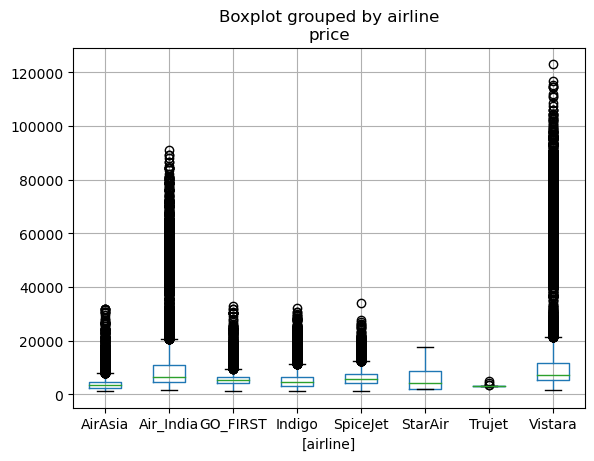

In [284]:
#check for outliers
df.boxplot(column='price', by=['airline'])
plt.show()

In [285]:
# Calculate the average ticket prices for each airline
df.groupby(['airline','class'])['price'].mean()

airline    class   
AirAsia    Economy      4091.072742
Air_India  Business    50784.942770
           Economy      7313.730144
GO_FIRST   Economy      5651.930578
Indigo     Economy      5324.216303
SpiceJet   Economy      6179.278881
StarAir    Economy      4932.655738
Trujet     Economy      3244.634146
Vistara    Business    59405.480563
           Economy      7819.827008
Name: price, dtype: float64

In [286]:
#number of flights by each airline
df['airline'].value_counts(ascending=False)

Vistara      77388
Air_India    52574
Indigo       43120
GO_FIRST     23177
AirAsia      16098
SpiceJet      9011
StarAir         61
Trujet          41
Name: airline, dtype: int64

In [287]:
#calculate the most popular destinations
df['destination_city'].value_counts(ascending=False)

Mumbai       43084
Delhi        42865
Bangalore    38502
Kolkata      37029
Hyderabad    31169
Chennai      28821
Name: destination_city, dtype: int64

In [288]:
#Check the busiest time of the day to fly
df['departure_time'].value_counts(ascending=False)

Morning      99313
Evening      53314
Afternoon    46720
Night        22123
Name: departure_time, dtype: int64